In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import warnings 
import statsmodels.api as sm

# Read data

In [5]:
data=pd.read_csv("Weather_Data.csv")

In [6]:
data.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


# Basic Analytics

In [7]:
data["Wind Speed_km/h"]

0        4
1        4
2        7
3        6
4        7
        ..
8779    30
8780    24
8781    28
8782    28
8783    30
Name: Wind Speed_km/h, Length: 8784, dtype: int64

In [8]:
wind_speed_data=data[["Date/Time","Wind Speed_km/h"]]
print(wind_speed_data.head())
print(wind_speed_data.tail())

       Date/Time  Wind Speed_km/h
0  1/1/2012 0:00                4
1  1/1/2012 1:00                4
2  1/1/2012 2:00                7
3  1/1/2012 3:00                6
4  1/1/2012 4:00                7
             Date/Time  Wind Speed_km/h
8779  12/31/2012 19:00               30
8780  12/31/2012 20:00               24
8781  12/31/2012 21:00               28
8782  12/31/2012 22:00               28
8783  12/31/2012 23:00               30


In [9]:
wind_speed_data.shape

(8784, 2)

In [10]:
wind_speed_data.dtypes

Date/Time          object
Wind Speed_km/h     int64
dtype: object

In [11]:
wind_speed_data.isnull().sum()

Date/Time          0
Wind Speed_km/h    0
dtype: int64

In [12]:
wind_speed_data["Date/Time"]=pd.to_datetime(wind_speed_data["Date/Time"])

In [13]:
# wind_speed_data
wind_speed_data.dtypes

Date/Time          datetime64[ns]
Wind Speed_km/h             int64
dtype: object

In [14]:
wind_speed_data = wind_speed_data.rename(columns={'Date/Time': 'Date'})

In [15]:
wind_speed_data.set_index("Date",inplace=True)

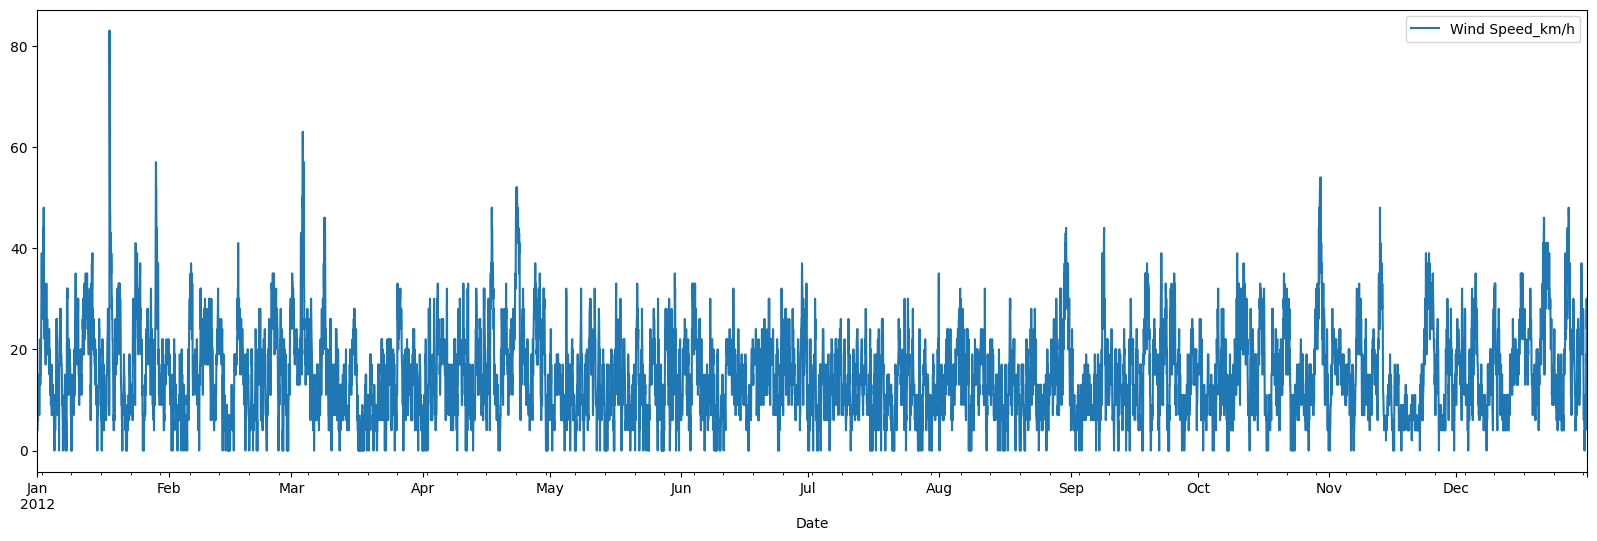

In [16]:
wind_speed_data.plot(figsize=(20,6))
plt.show()

In [17]:
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in list(itertools.product(p,d,q))]

print('Examples of parameter combinations for Seasonal ARIMA:')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA:
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 0, 1) x (0, 1, 1, 12)
SARIMAX: (0, 0, 1) x (1, 0, 0, 12)


In [18]:
pdq

[(0, 0, 0),
 (0, 0, 1),
 (0, 1, 0),
 (0, 1, 1),
 (1, 0, 0),
 (1, 0, 1),
 (1, 1, 0),
 (1, 1, 1)]

In [19]:
seasonal_pdq

[(0, 0, 0, 12),
 (0, 0, 1, 12),
 (0, 1, 0, 12),
 (0, 1, 1, 12),
 (1, 0, 0, 12),
 (1, 0, 1, 12),
 (1, 1, 0, 12),
 (1, 1, 1, 12)]

In [20]:
warnings.filterwarnings("ignore")

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(wind_speed_data,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}')
        except:
            continue

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  4.26848D+00    |proj g|=  6.19940D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   6.199D-06   4.268D+00
  F =   4.2684804694904113     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables a

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  4.06321D+00    |proj g|=  6.88549D-02

At iterate   10    f=  4.01953D+00    |proj g|=  7.53621D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     15      1     0     0   3.229D-07   4.020D+00
  F =   4.0195173191831453     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.75903D+00    |proj g|=  1.39262D-04

           * * *


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.61362D+00    |proj g|=  1.11184D-01


 This problem is unconstrained.



At iterate    5    f=  3.57940D+00    |proj g|=  2.18252D-02

At iterate   10    f=  3.56618D+00    |proj g|=  1.37362D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     13     21      1     0     0   3.791D-06   3.566D+00
  F =   3.5661386722477681     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.71208D+00    |proj g|=  1.50454D-05


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     11      1     0     0   1.502D-05   3.712D+00
  F =   3.7120821134178050     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.68495D+00    |proj g|=  1.31580D+00


 This problem is unconstrained.



At iterate    5    f=  3.60291D+00    |proj g|=  4.05092D-01

At iterate   10    f=  3.58182D+00    |proj g|=  6.25940D-02

At iterate   15    f=  3.58169D+00    |proj g|=  3.73427D-01

At iterate   20    f=  3.57471D+00    |proj g|=  1.17657D+00

At iterate   25    f=  3.57165D+00    |proj g|=  1.68172D-01

At iterate   30    f=  3.57163D+00    |proj g|=  1.50998D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     31     49      1     0     0   3.767D-05   3.572D+00
  F =   3.5716278561346035     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}

 This problem is unconstrained.


ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.64139D+00    |proj g|=  9.15063D-02


 This problem is unconstrained.


  ys=-2.929E-02  -gs= 5.589E-02 BFGS update SKIPPED

At iterate    5    f=  3.54422D+00    |proj g|=  2.08692D-02

At iterate   10    f=  3.53412D+00    |proj g|=  1.13114D-01

At iterate   15    f=  3.53332D+00    |proj g|=  2.19862D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     28      1     1     0   2.199D-05   3.533D+00
  F =   3.5333209752578236     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 va

 This problem is unconstrained.



At iterate   10    f=  3.79051D+00    |proj g|=  4.32302D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     12     15      1     0     0   2.987D-06   3.791D+00
  F =   3.7905093633457172     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.89339D+00    |proj g|=  7.11614D-02


 This problem is unconstrained.



At iterate    5    f=  3.79722D+00    |proj g|=  3.29094D-01

At iterate   10    f=  3.62292D+00    |proj g|=  7.01054D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     14     20      1     0     0   1.708D-06   3.623D+00
  F =   3.6228972674129856     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.53277D+00    |proj g|=  2.02435D-01


 This problem is unconstrained.



At iterate    5    f=  3.51628D+00    |proj g|=  1.04775D-01

At iterate   10    f=  3.50015D+00    |proj g|=  2.62734D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2     11     13      1     0     0   1.751D-06   3.500D+00
  F =   3.5001525972203895     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.41595D+00    |proj g|=  1.13845D-01


 This problem is unconstrained.



At iterate    5    f=  3.34587D+00    |proj g|=  4.63714D-01

At iterate   10    f=  3.25924D+00    |proj g|=  4.26377D-02

At iterate   15    f=  3.25896D+00    |proj g|=  2.60724D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     15     25      1     0     0   2.607D-05   3.259D+00
  F =   3.2589564554687933     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate    5    f=  3.52697D+00    |proj g|=  1.46464D-01

At iterate   10    f=  3.43380D+00    |proj g|=  1.01623D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     21      1     0     0   3.587D-06   3.434D+00
  F =   3.4337974426172218     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.83145D+00    |proj g|=  1.21722D-01


 This problem is unconstrained.



At iterate    5    f=  3.77305D+00    |proj g|=  7.76581D-01

At iterate   10    f=  3.75382D+00    |proj g|=  2.68147D-01

At iterate   15    f=  3.74317D+00    |proj g|=  4.12864D-01

At iterate   20    f=  3.27367D+00    |proj g|=  1.31951D-01

At iterate   25    f=  3.26495D+00    |proj g|=  7.56279D-01

At iterate   30    f=  3.26416D+00    |proj g|=  6.46026D-03



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     31     74      1     0     0   6.460D-03   3.264D+00
  F =   3.2641649538520165     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.44953D+00    |proj g|=  1.47785D-01


 This problem is unconstrained.



At iterate    5    f=  3.41859D+00    |proj g|=  2.08947D-01

At iterate   10    f=  3.37751D+00    |proj g|=  7.82199D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     15      1     0     0   5.353D-07   3.378D+00
  F =   3.3775122652500489     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.43829D+00    |proj g|=  1.32320D-01


 This problem is unconstrained.



At iterate    5    f=  3.35742D+00    |proj g|=  4.84316D-01

At iterate   10    f=  3.30748D+00    |proj g|=  1.19848D-01

At iterate   15    f=  3.24570D+00    |proj g|=  1.51894D-01

At iterate   20    f=  3.24344D+00    |proj g|=  1.25090D-02

At iterate   25    f=  3.24343D+00    |proj g|=  7.51720D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     47      1     0     0   3.472D-06   3.243D+00
  F =   3.2434252274006097     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precisio

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.98876D+00    |proj g|=  6.48583D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      5      8      1     0     0   6.486D-06   2.989D+00
  F =   2.9887632075539114     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.34731D+00    |proj g|=  2.24946D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      1      3      1     0     0   7.677D-06   3.347D+00
  F =   3.3473058321190687     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables a

 This problem is unconstrained.



At iterate    5    f=  2.98787D+00    |proj g|=  1.07710D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      8     12      1     0     0   8.367D-06   2.988D+00
  F =   2.9878616460309502     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98907D+00    |proj g|=  4.99054D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of fu

 This problem is unconstrained.


ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.98890D+00    |proj g|=  1.41574D-02


 This problem is unconstrained.



At iterate    5    f=  2.98880D+00    |proj g|=  8.02223D-04

At iterate   10    f=  2.98792D+00    |proj g|=  2.24377D-01

At iterate   15    f=  2.98658D+00    |proj g|=  3.19613D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     19     57      1     0     0   2.151D-06   2.986D+00
  F =   2.9864527505691871     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.


ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.07024D+00    |proj g|=  2.23716D-01


 This problem is unconstrained.



At iterate    5    f=  2.99886D+00    |proj g|=  1.03688D-01

At iterate   10    f=  2.99380D+00    |proj g|=  8.23230D-02

At iterate   15    f=  2.98783D+00    |proj g|=  7.11946D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     18     25      1     0     0   1.532D-05   2.988D+00
  F =   2.9878308347667346     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.


ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94846D+00    |proj g|=  1.76724D-02


 This problem is unconstrained.



At iterate    5    f=  2.94826D+00    |proj g|=  2.21796D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      7      9      1     0     0   2.360D-06   2.948D+00
  F =   2.9482616361009177     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31658D+00    |proj g|=  4.62296D-03


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      3      5      1     0     0   1.589D-05   3.317D+00
  F =   3.3165670452911900     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.08357D+00    |proj g|=  1.60021D-01


 This problem is unconstrained.



At iterate    5    f=  3.01110D+00    |proj g|=  2.20704D-01

At iterate   10    f=  2.94775D+00    |proj g|=  2.91223D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     19      1     0     0   6.277D-07   2.948D+00
  F =   2.9477493764679119     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94935D+00    |proj g|=  1.94085D-02


 This problem is unconstrained.



At iterate    5    f=  2.94898D+00    |proj g|=  4.09477D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      6      9      1     0     0   1.969D-06   2.949D+00
  F =   2.9489801906274002     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94854D+00    |proj g|=  1.75702D-02


 This problem is unconstrained.



At iterate    5    f=  2.94835D+00    |proj g|=  7.69050D-04

At iterate   10    f=  2.94647D+00    |proj g|=  7.32470D-02
  ys=-2.384E-03  -gs= 8.212E-04 BFGS update SKIPPED

At iterate   15    f=  2.93985D+00    |proj g|=  1.04517D-01

At iterate   20    f=  2.93975D+00    |proj g|=  8.85493D-03

At iterate   25    f=  2.93975D+00    |proj g|=  1.99534D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     26     63      1     1     0   1.995D-04   2.940D+00
  F =   2.9397512507940324     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.16985D+00    |proj g|=  4.26026D-02


 This problem is unconstrained.



At iterate    5    f=  3.14389D+00    |proj g|=  3.56277D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   7.495D-06   3.143D+00
  F =   3.1425930038166103     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09634D+00    |proj g|=  1.42348D-01


 This problem is unconstrained.



At iterate    5    f=  3.02394D+00    |proj g|=  5.47812D-01

At iterate   10    f=  2.94863D+00    |proj g|=  1.28732D-01

At iterate   15    f=  2.94704D+00    |proj g|=  8.09863D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     17     24      1     0     0   9.237D-08   2.947D+00
  F =   2.9470405996036533     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     18      1     0     0   6.530D-05   2.983D+00
  F =   2.9832876087789160     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.04858D+00    |proj g|=  4.62028D-01



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.
 This problem is unconstrained.



At iterate    5    f=  2.97961D+00    |proj g|=  1.37569D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      8     12      1     0     0   4.514D-06   2.980D+00
  F =   2.9796021956414460     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.28975D+00    |proj g|=  1.27847D-05


 This problem is unconstrained.

 Line search cannot locate an adequate point after MAXLS
  function and gradient evaluations.
  Previous x, f and g restored.
 Possible causes: 1 error in function or gradient evaluation;
                  2 rounding error dominate computation.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    2      1     21      1     0     0   1.278D-05   3.290D+00
  F =   3.2897483162270942     

ABNORMAL_TERMINATION_IN_LNSRCH                              
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}


 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10523D+00    |proj g|=  1.94007D-01

At iterate    5    f=  3.02475D+00    |proj g|=  2.58386D-01

At iterate   10    f=  2.94792D+00    |proj g|=  8.70470D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     21      1     0     0   1.479D-05   2.948D+00
  F =   2.9479241676520633     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS

 This problem is unconstrained.



At iterate    5    f=  2.98026D+00    |proj g|=  5.14743D-02

At iterate   10    f=  2.97964D+00    |proj g|=  2.93000D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     13     18      1     0     0   2.696D-06   2.980D+00
  F =   2.9795997009198638     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.05054D+00    |proj g|=  4.45570D-01


 This problem is unconstrained.



At iterate    5    f=  2.97889D+00    |proj g|=  2.66658D-03

At iterate   10    f=  2.97793D+00    |proj g|=  1.32059D-01

At iterate   15    f=  2.96864D+00    |proj g|=  8.25559D-01

At iterate   20    f=  2.95401D+00    |proj g|=  1.05881D+00

At iterate   25    f=  2.95229D+00    |proj g|=  1.69529D-01

At iterate   30    f=  2.95226D+00    |proj g|=  4.24710D-03

At iterate   35    f=  2.95226D+00    |proj g|=  2.91502D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     36     63      1     0     0   2.861D-02   2.952D+00
  F =   2.9522573709312576     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH   

 This problem is unconstrained.



At iterate    5    f=  3.13425D+00    |proj g|=  8.18978D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     11      1     0     0   1.550D-05   3.132D+00
  F =   3.1324603376463482     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.13472D+00    |proj g|=  1.22918D-01


 This problem is unconstrained.



At iterate    5    f=  3.04551D+00    |proj g|=  2.98054D-01

At iterate   10    f=  2.96093D+00    |proj g|=  2.11925D-01

At iterate   15    f=  2.94793D+00    |proj g|=  9.06804D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     18     27      1     0     0   2.099D-05   2.948D+00
  F =   2.9479231864719413     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate   10    f=  2.94885D+00    |proj g|=  1.44135D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     10     13      1     0     0   1.441D-05   2.949D+00
  F =   2.9488478131796509     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02524D+00    |proj g|=  5.12035D-01


 This problem is unconstrained.



At iterate    5    f=  2.94494D+00    |proj g|=  2.72334D-02

At iterate   10    f=  2.94450D+00    |proj g|=  7.36324D-03

At iterate   15    f=  2.94448D+00    |proj g|=  7.86140D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     15     18      1     0     0   7.861D-06   2.944D+00
  F =   2.9444795637721977     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      8      1     0     0   3.541D-05   3.281D+00
  F =   3.2805330630004010     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09217D+00    |proj g|=  1.98984D-01


 This problem is unconstrained.



At iterate    5    f=  3.00876D+00    |proj g|=  7.44126D-02

At iterate   10    f=  2.92787D+00    |proj g|=  2.60407D-02

At iterate   15    f=  2.92730D+00    |proj g|=  1.74637D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     25      1     0     0   6.255D-06   2.927D+00
  F =   2.9273013244233832     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.



At iterate    5    f=  2.94947D+00    |proj g|=  6.41602D-02

At iterate   10    f=  2.94482D+00    |proj g|=  1.57252D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     29      1     0     0   2.796D-05   2.945D+00
  F =   2.9448180710612966     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             



   evaluations in the last line search.  Termination
   may possibly be caused by a bad search direction.


ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.02359D+00    |proj g|=  4.60507D-01


 This problem is unconstrained.



At iterate    5    f=  2.94540D+00    |proj g|=  2.92641D-02

At iterate   10    f=  2.94498D+00    |proj g|=  1.28907D-03

At iterate   15    f=  2.94497D+00    |proj g|=  1.81485D-04

At iterate   20    f=  2.94497D+00    |proj g|=  1.45262D-03

At iterate   25    f=  2.94490D+00    |proj g|=  5.16061D-02

At iterate   30    f=  2.94370D+00    |proj g|=  1.19361D-01

At iterate   35    f=  2.94143D+00    |proj g|=  2.46414D-01

At iterate   40    f=  2.93662D+00    |proj g|=  1.26504D-01

At iterate   45    f=  2.93620D+00    |proj g|=  2.75752D-02

At iterate   50    f=  2.93619D+00    |proj g|=  3.22264D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tn

 This problem is unconstrained.



At iterate    5    f=  3.11849D+00    |proj g|=  6.44327D-02

At iterate   10    f=  3.11546D+00    |proj g|=  1.79998D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     13      1     0     0   1.800D-06   3.115D+00
  F =   3.1154624217568694     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.12032D+00    |proj g|=  1.29795D-01


 This problem is unconstrained.



At iterate    5    f=  3.03247D+00    |proj g|=  3.15559D-01

At iterate   10    f=  2.93807D+00    |proj g|=  1.09687D-01

At iterate   15    f=  2.92727D+00    |proj g|=  1.33803D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     19     30      1     0     0   3.391D-05   2.927D+00
  F =   2.9272603943069222     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0  

 This problem is unconstrained.
 This problem is unconstrained.



At iterate    5    f=  2.95482D+00    |proj g|=  7.37366D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      5      7      1     0     0   7.374D-06   2.955D+00
  F =   2.9548192857184903     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            2     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31972D+00    |proj g|=  5.28773D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of fu

 This problem is unconstrained.


ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.08778D+00    |proj g|=  1.59828D-01


 This problem is unconstrained.



At iterate    5    f=  3.01826D+00    |proj g|=  1.89756D-01

At iterate   10    f=  2.95419D+00    |proj g|=  1.46024D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     12     21      1     0     0   7.754D-08   2.954D+00
  F =   2.9541888234665721     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95486D+00    |proj g|=  1.28430D-02


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      4      6      1     0     0   8.699D-06   2.955D+00
  F =   2.9547799700121504     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95488D+00    |proj g|=  1.98201D-03


 This problem is unconstrained.



At iterate    5    f=  2.95487D+00    |proj g|=  1.97127D-03

At iterate   10    f=  2.95260D+00    |proj g|=  4.81161D-02
  ys=-1.002E-02  -gs= 1.052E-03 BFGS update SKIPPED

At iterate   15    f=  2.95022D+00    |proj g|=  3.55570D-01

At iterate   20    f=  2.94901D+00    |proj g|=  1.09921D-02

At iterate   25    f=  2.94877D+00    |proj g|=  4.83221D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     27     64      1     1     0   1.089D-04   2.949D+00
  F =   2.9487720051772759     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING T

 This problem is unconstrained.



At iterate    5    f=  3.14907D+00    |proj g|=  3.70779D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      9     12      1     0     0   1.620D-06   3.149D+00
  F =   3.1489888865117579     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.10086D+00    |proj g|=  1.42135D-01


 This problem is unconstrained.



At iterate    5    f=  3.03094D+00    |proj g|=  1.31206D-01

At iterate   10    f=  2.95393D+00    |proj g|=  5.01117D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     14     21      1     0     0   6.239D-05   2.954D+00
  F =   2.9538903177421005     

CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH             
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.95191D+00    |proj g|=  9.53846D-03


 This problem is unconstrained.



At iterate    5    f=  2.95160D+00    |proj g|=  3.05790D-04

At iterate   10    f=  2.95160D+00    |proj g|=  3.53859D-05

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3     11     14      1     0     0   2.762D-06   2.952D+00
  F =   2.9515967682294204     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94707D+00    |proj g|=  1.40035D-02


 This problem is unconstrained.



At iterate    5    f=  2.94663D+00    |proj g|=  9.25816D-03

At iterate   10    f=  2.94652D+00    |proj g|=  1.56512D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     14      1     0     0   8.976D-06   2.947D+00
  F =   2.9465195647025153     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            3     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.31639D+00    |proj g|=  2.43694D-04


 This problem is unconstrained.



           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    3      3      6      1     0     0   3.401D-06   3.316D+00
  F =   3.3163908386105216     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.08312D+00    |proj g|=  1.60110D-01


 This problem is unconstrained.



At iterate    5    f=  3.02347D+00    |proj g|=  1.84415D-01

At iterate   10    f=  2.94659D+00    |proj g|=  1.49716D-02

At iterate   15    f=  2.94631D+00    |proj g|=  1.69404D-02

At iterate   20    f=  2.94628D+00    |proj g|=  2.63021D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     20     28      1     0     0   2.630D-06   2.946D+00
  F =   2.9462753187719635     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0   

 This problem is unconstrained.



At iterate    5    f=  2.94682D+00    |proj g|=  4.39921D-03

At iterate   10    f=  2.94680D+00    |proj g|=  1.25966D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     10     14      1     0     0   1.260D-06   2.947D+00
  F =   2.9468022288488154     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.94716D+00    |proj g|=  1.38838D-02


 This problem is unconstrained.



At iterate    5    f=  2.94669D+00    |proj g|=  9.43381D-03

At iterate   10    f=  2.94657D+00    |proj g|=  2.67712D-03

At iterate   15    f=  2.94549D+00    |proj g|=  4.94236D-02

At iterate   20    f=  2.93923D+00    |proj g|=  1.04950D-01

At iterate   25    f=  2.93682D+00    |proj g|=  6.81507D-02

At iterate   30    f=  2.93638D+00    |proj g|=  5.38576D-03

At iterate   35    f=  2.93634D+00    |proj g|=  1.72602D-02

At iterate   40    f=  2.93631D+00    |proj g|=  2.13749D-03

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     43     85      1     0     0   1.574D-05   2.936D+00
  F =   2.93630978374

 This problem is unconstrained.



At iterate    5    f=  3.14071D+00    |proj g|=  1.51236D-02

At iterate   10    f=  3.14052D+00    |proj g|=  1.02228D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     12     17      1     0     0   8.824D-07   3.141D+00
  F =   3.1405185677522578     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}
RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            5     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09581D+00    |proj g|=  1.42428D-01


 This problem is unconstrained.



At iterate    5    f=  3.00678D+00    |proj g|=  1.58879D-01

At iterate   10    f=  2.94590D+00    |proj g|=  9.82000D-02

At iterate   15    f=  2.94549D+00    |proj g|=  4.95767D-03

At iterate   20    f=  2.94523D+00    |proj g|=  2.06823D-02

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    5     24     33      1     0     0   3.932D-06   2.945D+00
  F =   2.9452071845073169     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
ARIMA{param}x{param_seasonal}12 - AIC:{results.aic}


In [21]:
Best_model=sm.tsa.statespace.SARIMAX(wind_speed_data,
                                    order=(1,0,1),
                                    seasonal_order=(0,1,1,12),
                                    enforce_stationarity=False,
                                    enforce_invertibility=False)

results=Best_model.fit()

print(results.summary().tables[1])

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            4     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  3.09217D+00    |proj g|=  1.98984D-01


 This problem is unconstrained.



At iterate    5    f=  3.00876D+00    |proj g|=  7.44126D-02

At iterate   10    f=  2.92787D+00    |proj g|=  2.60407D-02

At iterate   15    f=  2.92730D+00    |proj g|=  1.74637D-04

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    4     16     25      1     0     0   6.255D-06   2.927D+00
  F =   2.9273013244233832     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9108      0.005    195.171      0.000       0.902       0.920


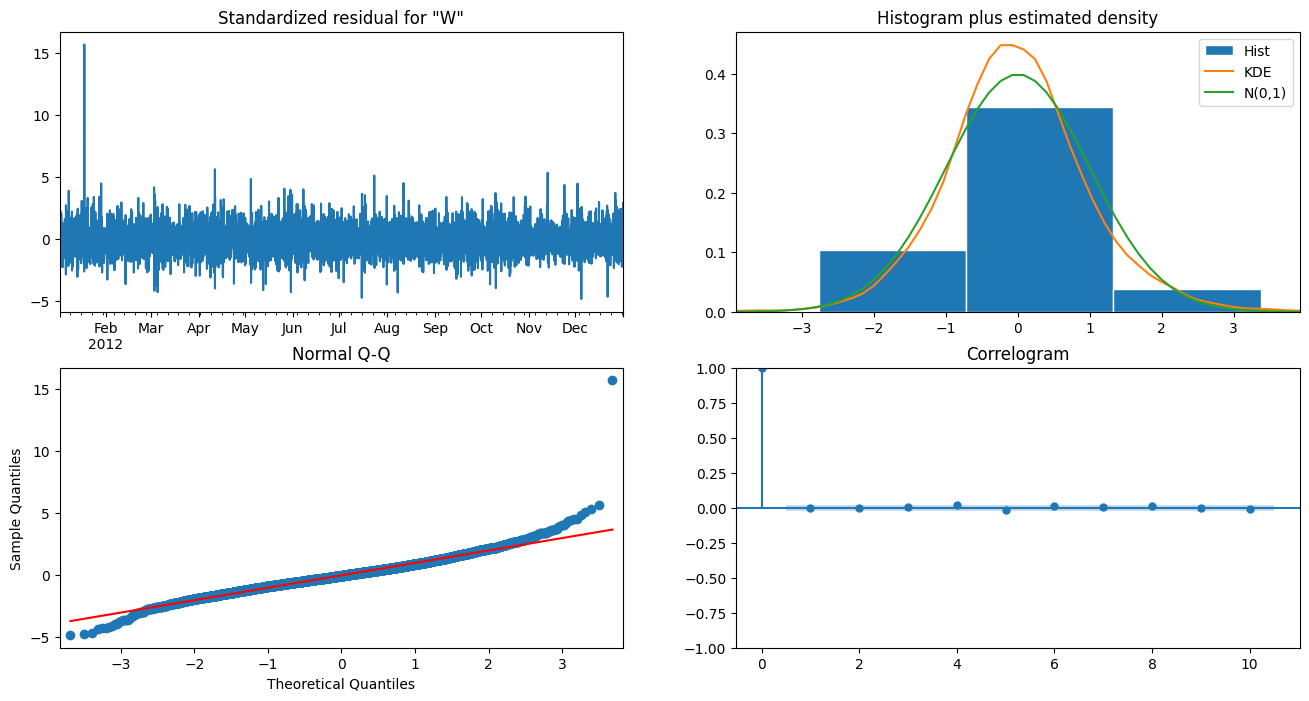

In [22]:
results.plot_diagnostics(figsize=(16,8))
plt.show()

In [23]:
pred=results.get_prediction(start=pd.to_datetime('2012-12-22 00:00:00'),dynamic=False)
pred_ci=pred.conf_int()
pred_ci

,lower Wind Speed_km/h,upper Wind Speed_km/h
2012-12-22 00:00:00,18.636971,36.458047
2012-12-22 01:00:00,20.863901,38.684977
2012-12-22 02:00:00,19.891210,37.712286
2012-12-22 03:00:00,19.479930,37.301006
2012-12-22 04:00:00,17.680206,35.501281
...,...,...
2012-12-31 19:00:00,7.725610,25.546665
2012-12-31 20:00:00,16.398890,34.219946
2012-12-31 21:00:00,14.944533,32.765588
2012-12-31 22:00:00,16.838496,34.659551


In [24]:
y_forecasted = pred.predicted_mean
y_truth = wind_speed_data["2012-12-22 00:00:00":]
y_truth['Pred_Wind_Speed']=y_forecasted
y_truth

,Wind Speed_km/h,Pred_Wind_Speed
Date,,
2012-12-22 00:00:00,32,27.547509
2012-12-22 01:00:00,30,29.774439
2012-12-22 02:00:00,30,28.801748
2012-12-22 03:00:00,28,28.390468
2012-12-22 04:00:00,35,26.590743
...,...,...
2012-12-31 19:00:00,30,16.636138
2012-12-31 20:00:00,24,25.309418
2012-12-31 21:00:00,28,23.855060


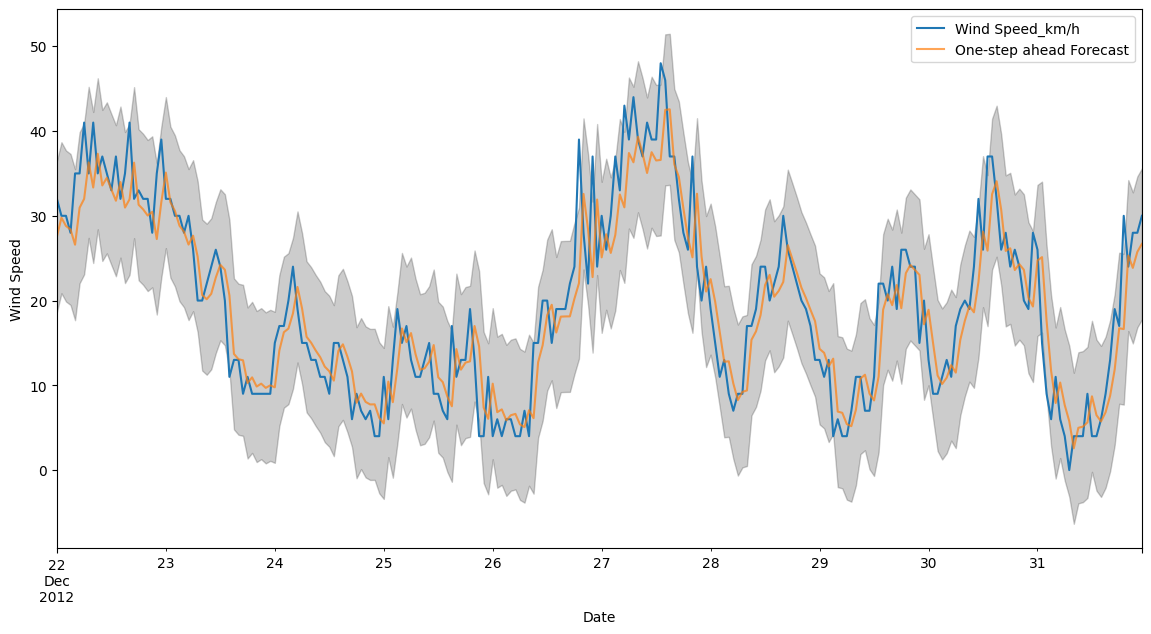

In [25]:
ax = wind_speed_data["2012-12-22 00:00:00":].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed')
plt.legend()

plt.show()

In [29]:
# MSE
mse = ((y_truth['Wind Speed_km/h'] - y_truth['Pred_Wind_Speed']) ** 2).mean()
print(mse)
rmse= np.sqrt(mse)
print(rmse)

21.08642262272906
4.591995494632923


In [30]:
pred_uc = results.get_forecast(steps=240)
pred_ci=pred_uc.conf_int()

In [31]:
future_df=pd.DataFrame(pred_uc.predicted_mean)
future_df.columns=["Future_Pred"]
future_df

,Future_Pred
2013-01-01 00:00:00,27.821856
2013-01-01 01:00:00,27.035113
2013-01-01 02:00:00,26.131511
2013-01-01 03:00:00,25.230101
2013-01-01 04:00:00,24.091897
...,...
2013-01-10 19:00:00,14.914907
2013-01-10 20:00:00,14.761962
2013-01-10 21:00:00,15.146315
2013-01-10 22:00:00,15.043828


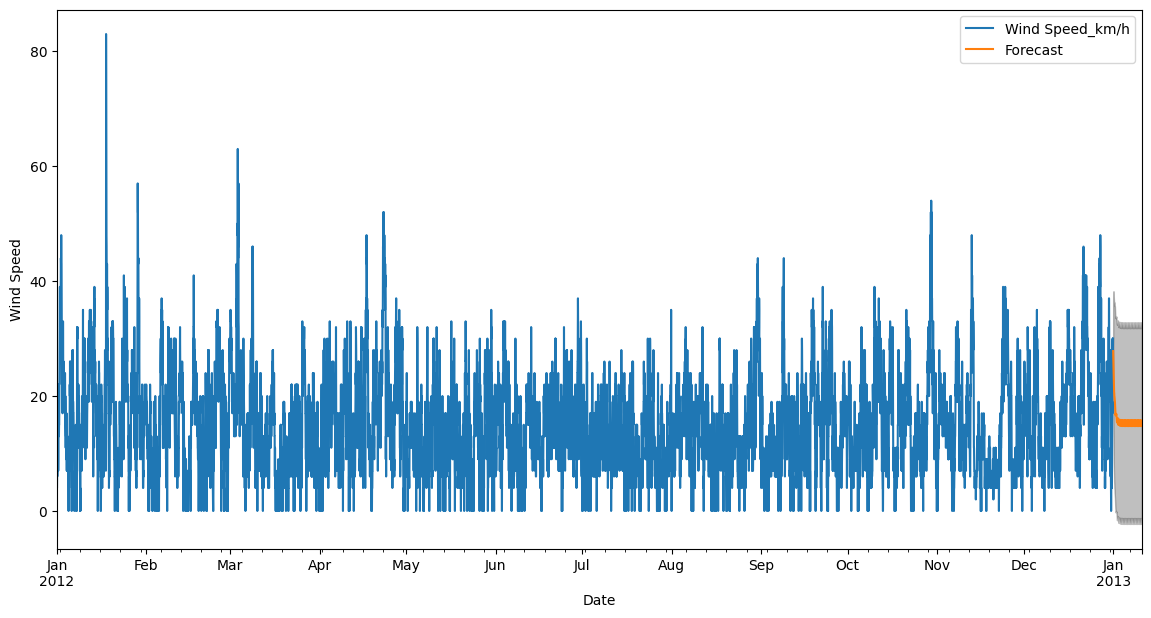

In [32]:
ax = wind_speed_data.plot(label='observed')
pred_uc.predicted_mean.plot(ax=ax, label='Forecast', figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)

ax.set_xlabel('Date')
ax.set_ylabel('Wind Speed')
plt.legend()

plt.show()

### What will be average wind speed on jan 9th 2013?

In [33]:
future_wind_df= future_df.reset_index()
future_wind_df

,index,Future_Pred
0,2013-01-01 00:00:00,27.821856
1,2013-01-01 01:00:00,27.035113
2,2013-01-01 02:00:00,26.131511
3,2013-01-01 03:00:00,25.230101
4,2013-01-01 04:00:00,24.091897
...,...,...
235,2013-01-10 19:00:00,14.914907
236,2013-01-10 20:00:00,14.761962
237,2013-01-10 21:00:00,15.146315
238,2013-01-10 22:00:00,15.043828


In [37]:
jan9= future_wind_df[(future_wind_df["index"]>= "2013-01-09 00:00:00") & (future_wind_df["index"]< "2013-01-10 00:00:00")]
avg_wind_speed = jan9["Future_Pred"].mean()
avg_wind_speed

15.300859038082953